In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# initialize COCO api for instance annotations
coco=COCO('/content/drive/MyDrive/compvis/Multi_instance/instances_val2014.json')

loading annotations into memory...
Done (t=15.98s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
vehicle electronic appliance outdoor indoor animal accessory kitchen food furniture sports person


In [7]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['dog','person']);
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))

676


In [5]:
catIds = coco.getCatIds(catNms=['dog']);
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))

1521


In [22]:
catIds = coco.getCatIds(catNms=['cat']);
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))

1480


In [33]:
import requests
images = coco.loadImgs(imgIds)
# Save the images into a local folder
for im in images:
    img_data = requests.get(im['coco_url']).content
    with open('/content/drive/MyDrive/compvis/Multi_instance/people_and_dogs_COCO/' + im['file_name'], 'wb') as handler:
        handler.write(img_data)

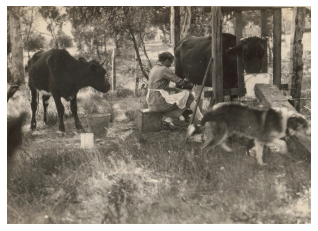

In [8]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[1872, 193169]
[372.88, 201.01, 267.12, 148.97]
18
[293.36, 97.47, 129.66, 153.65]
1


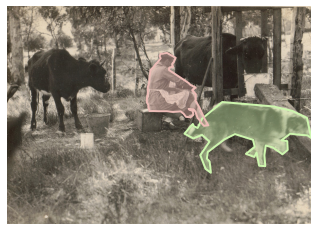

In [15]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
for ii in range(len(anns)):
  print(anns[ii]['bbox'])
  print(anns[ii]['category_id'])
coco.showAnns(anns)

In [ ]:
annids = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annids)
anns = coco.loadAnns(annids)
#print(anns)
mask = coco.annToMask(anns[0])
mask

[9808, 61976, 64049, 64716]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
anns[0]['category_id']

18

In [ ]:
 import torch
 torch.as_tensor(mask, dtype=torch.uint8)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
#each coco instance has own binary mask associated with it and a category id, could use these to make the binary masks I think. skipping having each instance and class with complicated multi labelling